In [1]:
%matplotlib inline
import  matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

#made with dr9 LRG as randoms, g,r,z,rhalf,e1,e2,n is fully inherited
dr9_lrg = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/real_lrg_seed/subset/sim_real_lrg_seed.fits')


In [2]:
def get_percentile(y,x,bins,percen_num):#16,50,84
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



def one_subplot_flux(title,variable,flux_diff,percentile=1):
    sel = (variable>=-10)&(variable<=10e9)
    variable = variable[sel]
    flux_diff = flux_diff[sel]
    lower = np.percentile(variable,percentile)
    higher = np.percentile(variable,100-percentile)
    print(lower,higher)
    sel2 = (variable>lower)&(variable<higher)
    variable = variable[sel2]
    flux_diff = flux_diff[sel2]
    
    sel3 = (flux_diff>-10)&(flux_diff<10)
    y = flux_diff[sel3]
    x = variable[sel3]
    
    plt.xlabel(title)
    plt.ylabel('delta flux/err')
    yl,xl = get_percentile(y,x,40,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,16)
    plt.plot(xl,yl,color = 'y')
    
    y2 = y[(y>-5)&(y<5)]
    x2 = x[(y>-5)&(y<5)]
    h,xe,ye,i = plt.hist2d(x2,y2,bins=40,cmap = 'Blues')
    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

In [3]:
keys = ['sim_rhalf','sim_sersic_n','ebv','fiberflux_z','psfsize_g','psfsize_r','psfsize_z','psfdepth_g','psfdepth_r','psfdepth_z']

In [4]:
delta_flux_g = (dr9_lrg['flux_g']-dr9_lrg['sim_gflux'])*np.sqrt(dr9_lrg['flux_ivar_g'])
delta_flux_r = (dr9_lrg['flux_r']-dr9_lrg['sim_rflux'])*np.sqrt(dr9_lrg['flux_ivar_r'])
delta_flux_z = (dr9_lrg['flux_z']-dr9_lrg['sim_zflux'])*np.sqrt(dr9_lrg['flux_ivar_z'])

0.0 3.67260025024
0.0 3.67260025024
0.0 3.67260025024


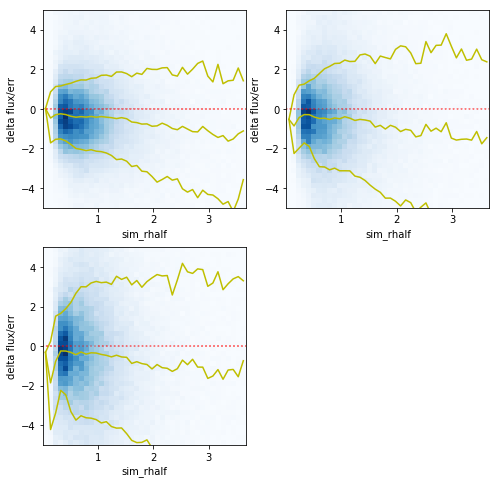

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
one_subplot_flux('sim_rhalf',dr9_lrg['sim_rhalf'],delta_flux_g)

plt.subplot(2,2,2)
one_subplot_flux('sim_rhalf',dr9_lrg['sim_rhalf'],delta_flux_r)

plt.subplot(2,2,3)
one_subplot_flux('sim_rhalf',dr9_lrg['sim_rhalf'],delta_flux_z)

1.15495765209 2.09376835823
1.02675080299 1.9380719614
0.953677356243 1.93216145515


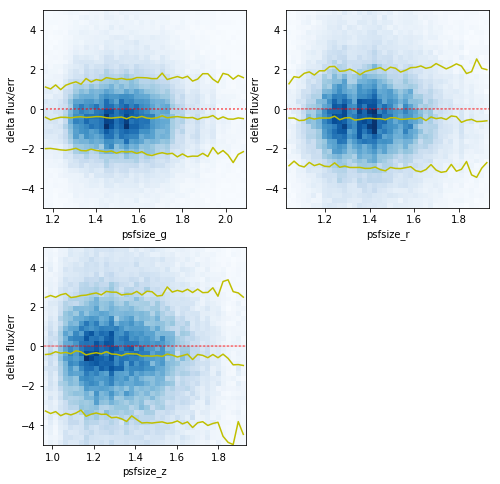

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
one_subplot_flux('psfsize_g',dr9_lrg['psfsize_g'],delta_flux_g)

plt.subplot(2,2,2)
one_subplot_flux('psfsize_r',dr9_lrg['psfsize_r'],delta_flux_r)

plt.subplot(2,2,3)
one_subplot_flux('psfsize_z',dr9_lrg['psfsize_z'],delta_flux_z)

296.624206543 5070.75769531
103.804748535 3667.69042969
17.5158272552 423.535783691


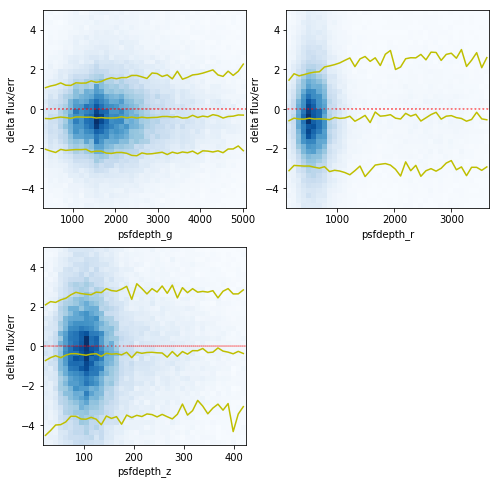

In [7]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
#sel = (dr9_lrg['psfdepth_z']>110)
sel=True
one_subplot_flux('psfdepth_g',dr9_lrg['psfdepth_g'][sel],delta_flux_g[sel])

plt.subplot(2,2,2)
one_subplot_flux('psfdepth_r',dr9_lrg['psfdepth_r'][sel],delta_flux_r[sel])

plt.subplot(2,2,3)
one_subplot_flux('psfdepth_z',dr9_lrg['psfdepth_z'][sel],delta_flux_z[sel])

206.051300049 3079.59692383
74.8457794189 2010.11907715
10.8579511642 214.01071167


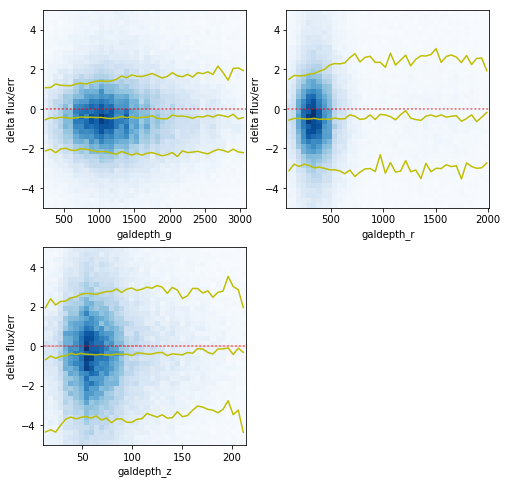

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
one_subplot_flux('galdepth_g',dr9_lrg['galdepth_g'],delta_flux_g)
plt.subplot(2,2,2)
one_subplot_flux('galdepth_r',dr9_lrg['galdepth_r'],delta_flux_r)
plt.subplot(2,2,3)
one_subplot_flux('galdepth_z',dr9_lrg['galdepth_z'],delta_flux_z)

1.0 6.0
1.0 6.0
1.0 6.0


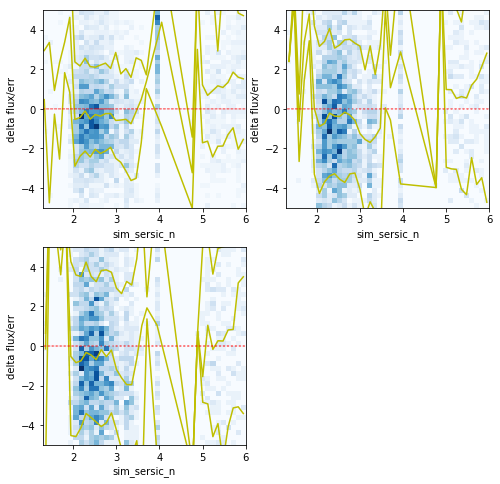

In [9]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel = (dr9_lrg['type']=='SER')
one_subplot_flux('sim_sersic_n',dr9_lrg[sel]['sim_sersic_n'],delta_flux_g[sel])
plt.subplot(2,2,2)
one_subplot_flux('sim_sersic_n',dr9_lrg[sel]['sim_sersic_n'],delta_flux_r[sel])
plt.subplot(2,2,3)
one_subplot_flux('sim_sersic_n',dr9_lrg[sel]['sim_sersic_n'],delta_flux_z[sel])

20.6609726715 25.0376325226
19.0209311676 22.6904087639
18.1003854942 20.7202885437


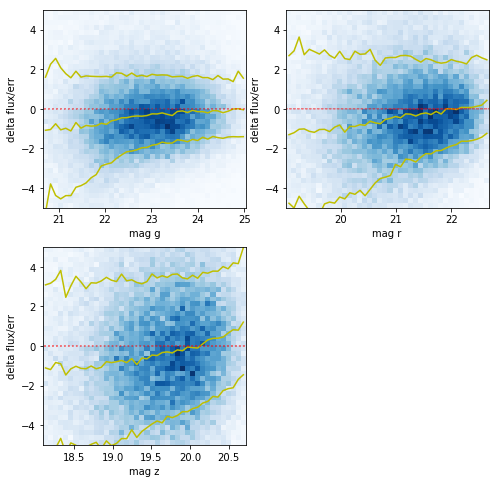

In [10]:
mag_g_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_gflux']/dr9_lrg['mw_transmission_g'])
mag_r_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_rflux']/dr9_lrg['mw_transmission_r'])
mag_z_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_zflux']/dr9_lrg['mw_transmission_z'])

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel = (dr9_lrg['type']=='DEV')
one_subplot_flux('mag g',mag_g_true[sel],delta_flux_g[sel])
plt.subplot(2,2,2)
one_subplot_flux('mag r ',mag_r_true[sel],delta_flux_r[sel])
plt.subplot(2,2,3)
one_subplot_flux('mag z',mag_z_true[sel],delta_flux_z[sel])

21.0625989532 25.8344659424
19.4574958038 23.0513589478
18.4763092041 20.9819902802


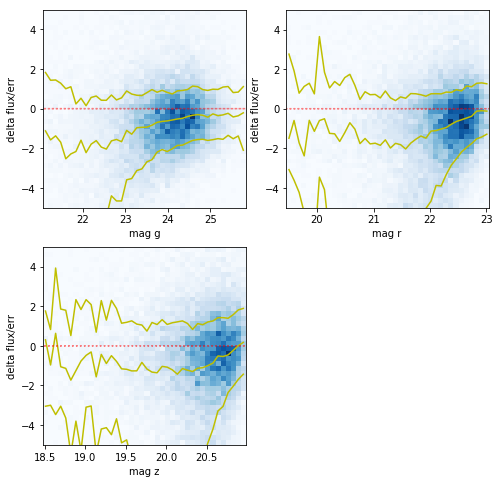

In [11]:
mag_g_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_gflux']/dr9_lrg['mw_transmission_g'])
mag_r_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_rflux']/dr9_lrg['mw_transmission_r'])
mag_z_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_zflux']/dr9_lrg['mw_transmission_z'])

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel = (dr9_lrg['type']=='REX')
one_subplot_flux('mag g',mag_g_true[sel],delta_flux_g[sel])
plt.subplot(2,2,2)
one_subplot_flux('mag r ',mag_r_true[sel],delta_flux_r[sel])
plt.subplot(2,2,3)
one_subplot_flux('mag z',mag_z_true[sel],delta_flux_z[sel])

20.6460744476 25.6614761353
19.1552653503 22.9666439819
18.2151253891 20.9218132782


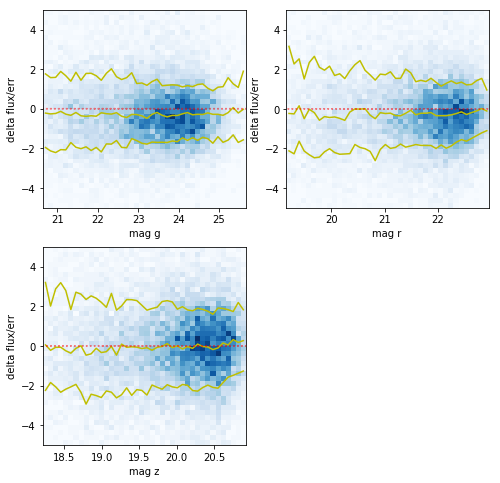

In [12]:
mag_g_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_gflux']/dr9_lrg['mw_transmission_g'])
mag_r_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_rflux']/dr9_lrg['mw_transmission_r'])
mag_z_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_zflux']/dr9_lrg['mw_transmission_z'])

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel = (dr9_lrg['type']=='EXP')
one_subplot_flux('mag g',mag_g_true[sel],delta_flux_g[sel])
plt.subplot(2,2,2)
one_subplot_flux('mag r ',mag_r_true[sel],delta_flux_r[sel])
plt.subplot(2,2,3)
one_subplot_flux('mag z',mag_z_true[sel],delta_flux_z[sel])

20.7178184509 26.071359787
19.1641055298 23.4613775635
18.1861676025 21.1339048386


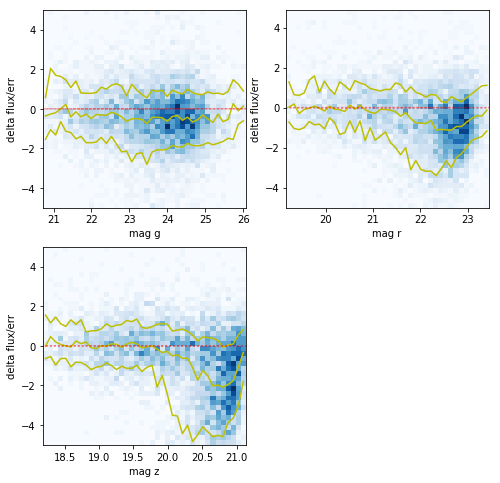

In [13]:
mag_g_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_gflux']/dr9_lrg['mw_transmission_g'])
mag_r_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_rflux']/dr9_lrg['mw_transmission_r'])
mag_z_true = 22.5 - 2.5 * np.log10(dr9_lrg['sim_zflux']/dr9_lrg['mw_transmission_z'])

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sel = (dr9_lrg['type']=='PSF')
one_subplot_flux('mag g',mag_g_true[sel],delta_flux_g[sel])
plt.subplot(2,2,2)
one_subplot_flux('mag r ',mag_r_true[sel],delta_flux_r[sel])
plt.subplot(2,2,3)
one_subplot_flux('mag z',mag_z_true[sel],delta_flux_z[sel])

2.55009584427 14.3281196594


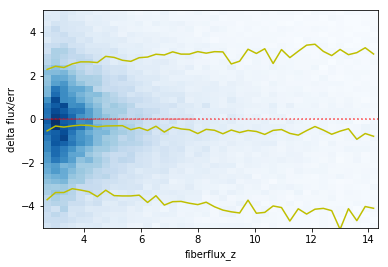

In [14]:
one_subplot_flux('fiberflux_z',dr9_lrg['fiberflux_z'],delta_flux_z,percentile=5)

4.2527859211 43.588344574


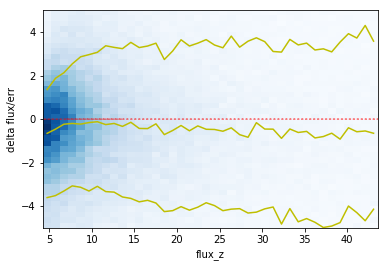

In [15]:
one_subplot_flux('flux_z',dr9_lrg['flux_z'],delta_flux_z,percentile=5)

In [130]:
sel1 = (dr9_lrg['type']=='DEV')
sel2 = (mag_g_true>22.8)&(mag_g_true<23.2)
sel3 = (mag_r_true>20.8)&(mag_r_true<21.2)
sel4 = (mag_z_true>19.3)&(mag_z_true<19.7)
sel5 = (dr9_lrg['galdepth_z']>50)&(dr9_lrg['galdepth_z']<60)
sel6 = (dr9_lrg['shape_r']>1.5)&(dr9_lrg['shape_r']<1.7)
sel7 = dr9_lrg['detected']&(dr9_lrg['maskbits']==0)
sel8 = (delta_flux_g>-4)&(delta_flux_g<4)
sel = sel1&sel2&sel3&sel4&sel5&sel6&sel7

In [131]:
delta_flux_g[sel]

array([  9.97300625,  -0.03539371,   0.35017899,   0.9665364 ,
         5.83395576,  -2.03430533,  -0.13074616,   0.71389341,
       -15.83430099,   4.15855503,  -0.60311782,   6.47302532,
        -2.44435525,  -0.73119223,   1.51240849,   0.64215761,
         1.41819465,   7.46116734,  -0.11823731,  -2.6604085 ,
        -0.7520898 ,   1.03913951], dtype=float32)

(array([  1.,   0.,   0.,   0.,   0.,   6.,  10.,   1.,   2.,   2.]),
 array([-15.83430099, -13.25357027, -10.67283955,  -8.09210882,
         -5.5113781 ,  -2.93064737,  -0.34991665,   2.23081408,
          4.8115448 ,   7.39227552,   9.97300625]),
 <a list of 10 Patch objects>)

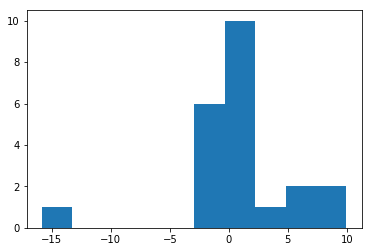

In [132]:
plt.hist(delta_flux_g[sel])

In [119]:
sel8 = delta_flux_g>8
sel = sel1&sel2&sel3&sel4&sel5&sel6&sel7&sel8

In [123]:
dr9_lrg[sel]['bx'], dr9_lrg[sel]['by'],dr9_lrg[sel]['brickname']

(array([ 2983.71923828], dtype=float32),
 array([ 824.18103027], dtype=float32),
 chararray(['0074p180'],
           dtype='<U8'))

In [126]:
dr9_lrg[sel]['flux_g'],dr9_lrg[sel]['sim_gflux'],dr9_lrg[sel]['flux_ivar_g']

(array([ 1.06601655], dtype=float32),
 array([ 0.53003794], dtype=float32),
 array([ 346.22406006], dtype=float32))

In [145]:
sel8 = delta_flux_g<-1

In [146]:
sel = sel1&sel2&sel3&sel4&sel5&sel6&sel7&sel8

In [147]:
dr9_lrg[sel]['bx'], dr9_lrg[sel]['by'],dr9_lrg[sel]['brickname']

(array([ 2046.99291992,   694.85906982,   997.66436768,  2328.41967773], dtype=float32),
 array([ 2493.53100586,   144.48817444,  3175.41333008,  1748.89294434], dtype=float32),
 chararray(['1433p192', '1746p305', '2538p047', '3331m115'],
           dtype='<U8'))

In [159]:
sel8 = delta_flux_g>2
sel = sel1&sel2&sel3&sel4&sel5&sel6&sel7&sel8
dr9_lrg[sel]['bx'], dr9_lrg[sel]['by'],dr9_lrg[sel]['brickname']

(array([ 2983.71923828,  1172.91943359,    88.748703  ,  3400.56811523,
         2608.41577148], dtype=float32),
 array([  824.18103027,  2538.88256836,  1740.82629395,   203.73477173,
          553.28723145], dtype=float32),
 chararray(['0074p180', '1116p290', '1821p040', '3204p182', '3214m065'],
           dtype='<U8'))

In [148]:
delta_flux_g[sel]

array([ -2.03430533, -15.83430099,  -2.44435525,  -2.6604085 ], dtype=float32)

In [149]:
dr9_lrg[sel]['flux_g']

array([ 0.54143322, -0.10713966,  0.39120904,  0.5396713 ], dtype=float32)

In [150]:
dr9_lrg[sel]['sim_gflux']

array([ 0.64818937,  0.69960576,  0.48275724,  0.66207826], dtype=float32)

In [151]:
dr9_lrg[sel]['shape_r']

array([ 1.52455425,  1.56238496,  1.55295563,  1.52147579], dtype=float32)

In [153]:
dr9_lrg[sel]['shape_e1']**2+dr9_lrg[sel]['shape_e2']**2

array([ 0.19335473,  0.17257008,  0.11390264,  0.05713607], dtype=float32)

In [155]:
(dr9_lrg['sim_e1']**2+dr9_lrg['sim_e2']**2).mean()

0.05589262

In [157]:
(dr9_lrg[sel]['sim_e1']**2+dr9_lrg[sel]['sim_e2']**2)

array([ 0.32851234,  0.01579132,  0.14698598,  0.05320358], dtype=float32)

In [144]:
dr9_lrg[sel]['flux_g']

array([-0.10713966], dtype=float32)